<a href="https://colab.research.google.com/github/Terabyte007/Assignments/blob/main/Week_5_Applied_Learning_Assignments_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For advanced statistical data visualization

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart_attack_south_africa.csv to heart_attack_south_africa.csv


In [42]:
# Load the Dataset
df = pd.read_csv("heart_attack_south_africa.csv")

In [43]:
# View the first few rows
print(df.head())

   Patient_ID  Age  Gender  Cholesterol_Level  Blood_Pressure_Systolic  \
0           1   76  Female                156                       94   
1           2   39  Female                160                      185   
2           3   85    Male                254                      173   
3           4   45  Female                261                      187   
4           5   48    Male                206                      189   

   Blood_Pressure_Diastolic Smoking_Status Alcohol_Intake Physical_Activity  \
0                        79             No           High         Sedentary   
1                        88             No            Low         Sedentary   
2                       113            Yes       Moderate     Highly Active   
3                        65             No           High         Sedentary   
4                        84             No            Low            Active   

   Obesity_Index Diabetes_Status Family_History_Heart_Disease Diet_Quality  \
0 

In [6]:
# Check Data Types
print(df.dtypes)

Patient_ID                        int64
Age                               int64
Gender                           object
Cholesterol_Level                 int64
Blood_Pressure_Systolic           int64
Blood_Pressure_Diastolic          int64
Smoking_Status                   object
Alcohol_Intake                   object
Physical_Activity                object
Obesity_Index                   float64
Diabetes_Status                  object
Family_History_Heart_Disease     object
Diet_Quality                     object
Stress_Level                     object
Heart_Attack_History             object
Medication_Usage                 object
Triglycerides_Level               int64
LDL_Level                         int64
HDL_Level                         int64
Heart_Attack_Outcome              int64
dtype: object


In [7]:
# Check the dataframe info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patient_ID                    100000 non-null  int64  
 1   Age                           100000 non-null  int64  
 2   Gender                        100000 non-null  object 
 3   Cholesterol_Level             100000 non-null  int64  
 4   Blood_Pressure_Systolic       100000 non-null  int64  
 5   Blood_Pressure_Diastolic      100000 non-null  int64  
 6   Smoking_Status                100000 non-null  object 
 7   Alcohol_Intake                100000 non-null  object 
 8   Physical_Activity             100000 non-null  object 
 9   Obesity_Index                 100000 non-null  float64
 10  Diabetes_Status               100000 non-null  object 
 11  Family_History_Heart_Disease  100000 non-null  object 
 12  Diet_Quality                  100000 non-null

In [10]:
# Check missing values
print(df.isnull().sum())

Patient_ID                      0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
Smoking_Status                  0
Alcohol_Intake                  0
Physical_Activity               0
Obesity_Index                   0
Diabetes_Status                 0
Family_History_Heart_Disease    0
Diet_Quality                    0
Stress_Level                    0
Heart_Attack_History            0
Medication_Usage                0
Triglycerides_Level             0
LDL_Level                       0
HDL_Level                       0
Heart_Attack_Outcome            0
dtype: int64


**KDE Plot - Age vs. Heart Attack Outcome**

Modify the KDE plot to include shade=True, adjust bw_adjust for better smoothing, and use a different palette for better contrast.

Add a vertical line indicating the median age of patients who had a heart attack.

Title: "Age Distribution by Heart Attack Outcome"

X-axis Label: "Age (Years)"

Y-axis Label: "Density"

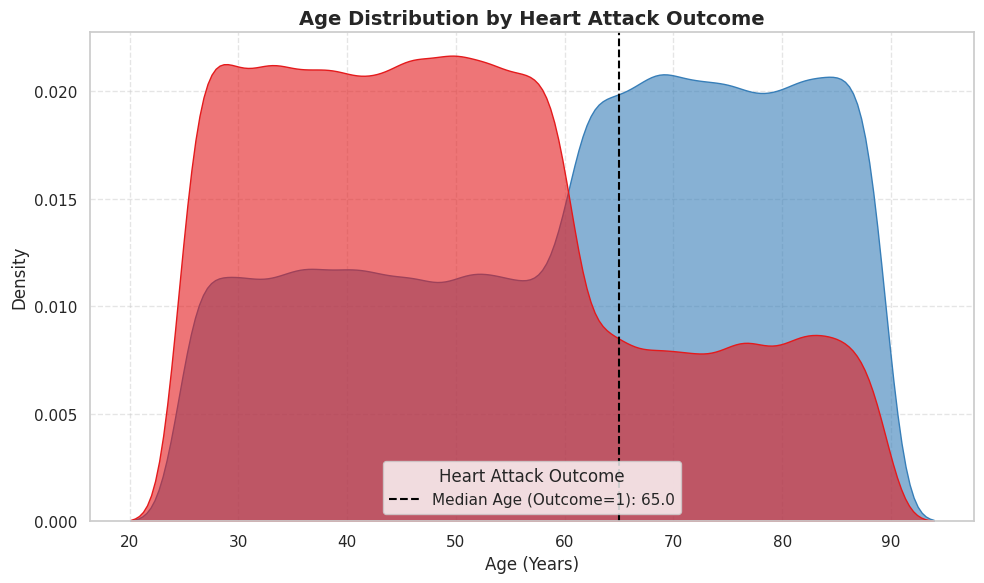

In [12]:
# Set plot style
sns.set(style="whitegrid")

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='Age',
    hue='Heart_Attack_Outcome',
    fill=True,
    bw_adjust=0.8,
    palette='Set1',
    common_norm=False,
    alpha=0.6
)

# Add vertical line for median age of patients who had a heart attack
median_age = df[df['Heart_Attack_Outcome'] == 1]['Age'].median()
plt.axvline(median_age, color='black', linestyle='--', linewidth=1.5, label=f'Median Age (Outcome=1): {median_age:.1f}')

# Add labels and title
plt.title('Age Distribution by Heart Attack Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Heart Attack Outcome')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Heatmap - Correlation of Risk Factors**

Generate a correlation matrix heatmap.

Adjust annotations, color map, and mask half the heatmap for better readability.

Ensure the most correlated features are highlighted distinctly.

Title: "Correlation of Heart Attack Risk Factors"

X-axis Label & Y-axis Label: Feature Names

### **Predictive Features for Heart Attack Risk**

These are the key variables to focus on for modeling and interpretation:

**Quantitative Predictors**
Age, Cholesterol_Level, Blood_Pressure_Systolic, Blood_Pressure_Diastolic, Obesity_Index, Triglycerides_Level, LDL_Level, HDL_Level

**Categorical / Lifestyle Predictors**
Smoking_Status, Physical_Activity, Diabetes_Status

**These variables are considered clinically relevant and should be prioritized for analysis and modeling.**

I will encode the categorical features to make them suitable for correlation analysis and machine learning models.

The **Smoking_Status** and **Diabetes_Status** columns will be converted from categorical (Yes/No) to numerical values where **0 represents "No"** and **1 represents "Yes"**.

The **Physical_Activity** column will be ordinally encoded to reflect increasing levels of activity:  
**0 for Sedentary**, **1 for Active**, and **2 for Highly Active**.

This transformation ensures that all relevant predictors are represented numerically, allowing for better statistical analysis and model performance.

In [45]:
# Encode categorical features
df['Smoking_Status'] = df['Smoking_Status'].map({'No': 0, 'Yes': 1})
df['Diabetes_Status'] = df['Diabetes_Status'].map({'No': 0, 'Yes': 1})
df['Physical_Activity'] = df['Physical_Activity'].map({
    'Sedentary': 0,
    'Active': 1,
    'Highly Active': 2
})

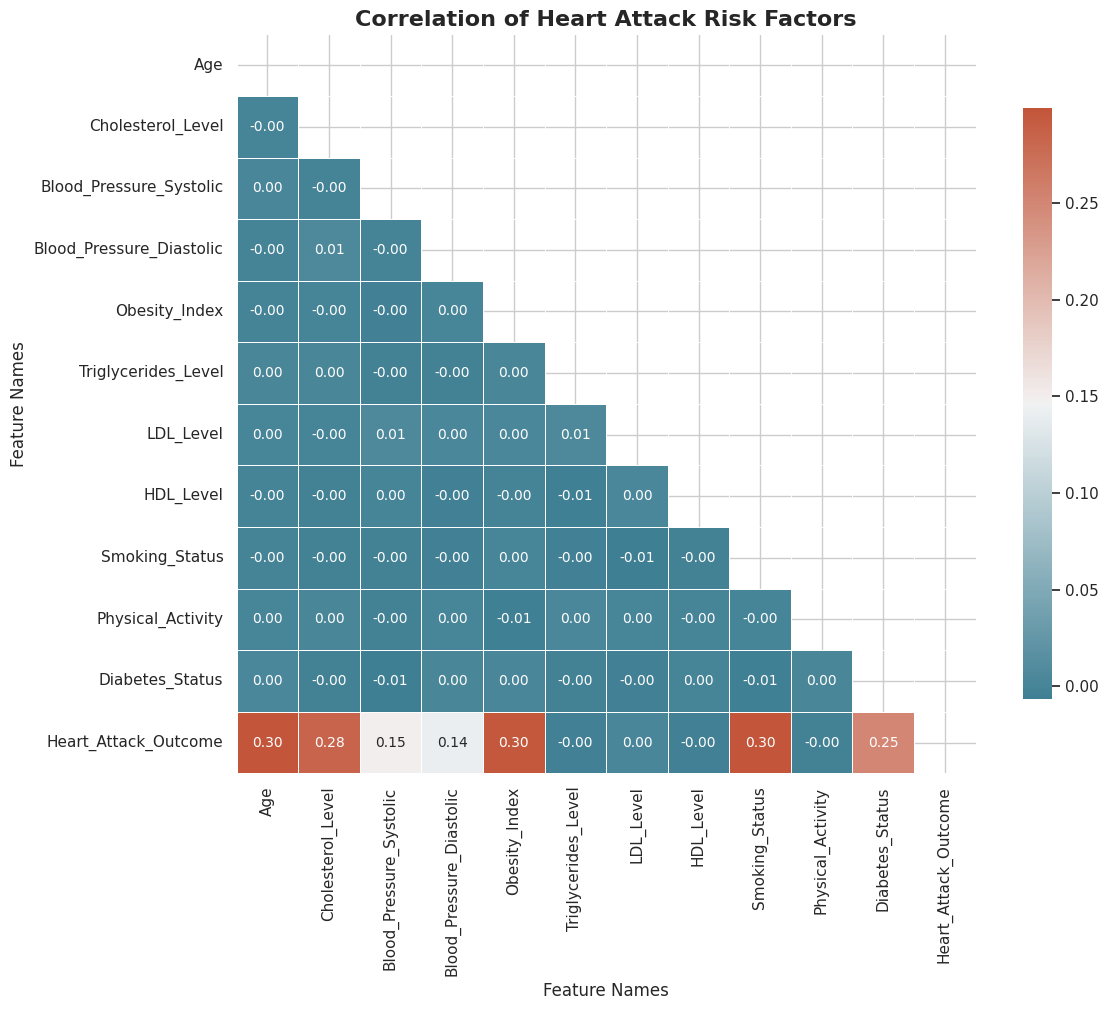

In [46]:
# Select updated feature list
selected_columns = [
    'Age',
    'Cholesterol_Level',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Obesity_Index',
    'Triglycerides_Level',
    'LDL_Level',
    'HDL_Level',
    'Smoking_Status',
    'Physical_Activity',
    'Diabetes_Status',
    'Heart_Attack_Outcome'
]
df_selected = df[selected_columns]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
    annot_kws={"size": 10}
)

# Add title and axis labels
plt.title('Correlation of Heart Attack Risk Factors', fontsize=16, fontweight='bold')
plt.xlabel('Feature Names', fontsize=12)
plt.ylabel('Feature Names', fontsize=12)

plt.tight_layout()
plt.show()

**Boxplot - Cholesterol Levels by Heart Attack Outcome**


Modify the boxplot to include hue="Gender" to compare cholesterol levels across males and females.

Adjust outlier visibility and tweak whiskers to better visualize cholesterol distribution.

Title: "Cholesterol Levels Distribution by Heart Attack Outcome and Gender"

X-axis Label: "Heart Attack Outcome (0 = No, 1 = Yes)"

Y-axis Label: "Cholesterol Level (mg/dL)"

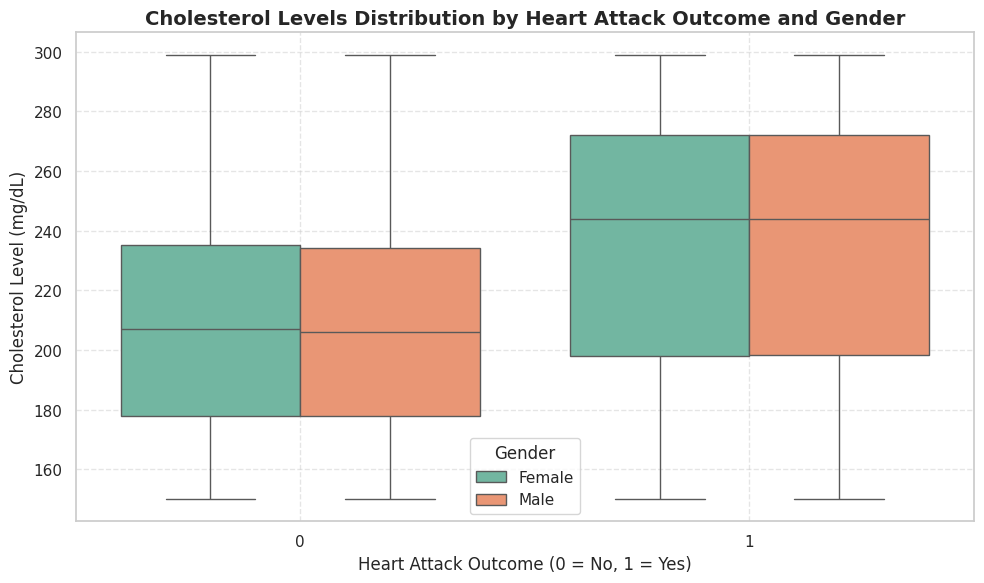

In [48]:
# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Heart_Attack_Outcome',
    y='Cholesterol_Level',
    hue='Gender',
    showfliers=False,       # Hide outliers for cleaner view
    whis=1.5,               # Adjust whiskers to 1.5x IQR
    palette='Set2'
)

# Add labels and title
plt.title('Cholesterol Levels Distribution by Heart Attack Outcome and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Heart Attack Outcome (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Cholesterol Level (mg/dL)', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Pairplot - Multiple Risk Factors & Outcome**

Create a pairplot including Cholesterol_Level, Obesity_Index, LDL_Level, and Heart_Attack_Outcome.

Adjust markers, increase plot size, and set diag_kind="kde" for better insight.

Title: "Pairwise Comparison of Key Risk Factors"

X-axis Label & Y-axis Label: Feature Names

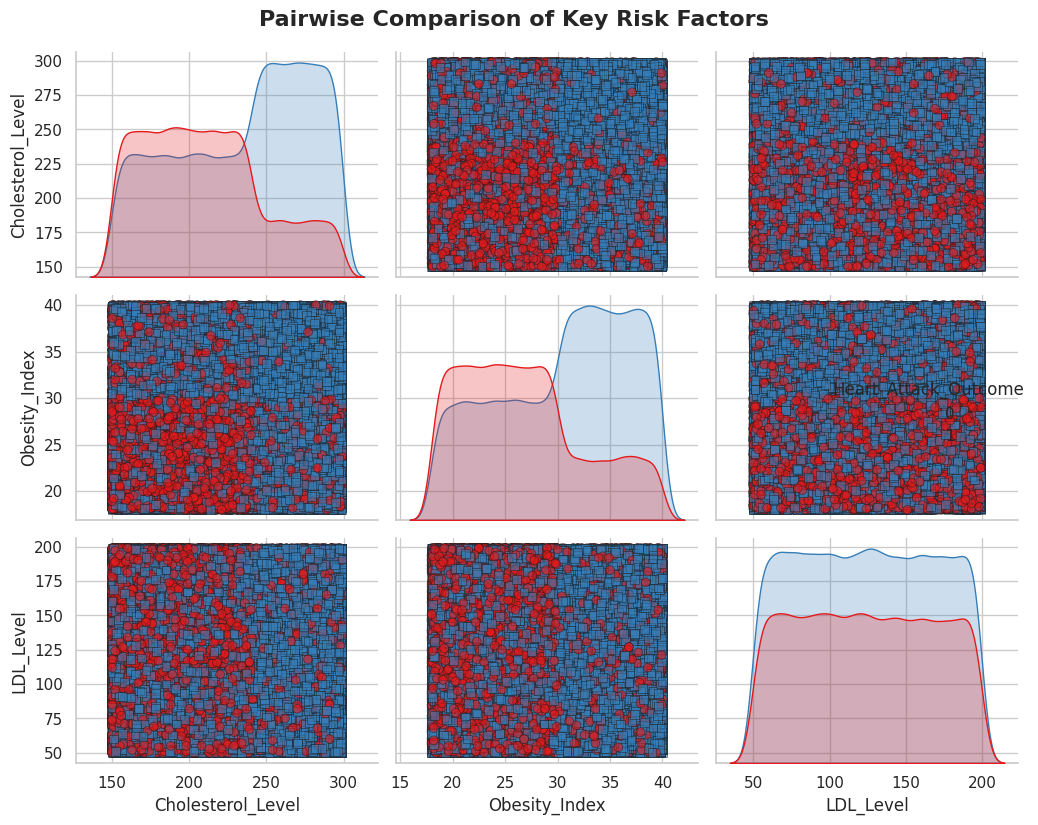

In [49]:
# Select relevant columns
pairplot_features = [
    'Cholesterol_Level',
    'Obesity_Index',
    'LDL_Level',
    'Heart_Attack_Outcome'
]
df_pairplot = df[pairplot_features]

# Create the pairplot
sns.set(style="whitegrid")
g = sns.pairplot(
    df_pairplot,
    hue='Heart_Attack_Outcome',
    diag_kind='kde',
    markers=['o', 's'],
    palette='Set1',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
    height=2.8
)

# Add a super title
g.fig.suptitle('Pairwise Comparison of Key Risk Factors', fontsize=16, fontweight='bold')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.93)  # Adjust to make room for title

# Axis labels are automatically set to feature names
plt.show()

**Violin Plot - Blood Pressure by Heart Attack Outcome**

Create a violin plot to compare Blood_Pressure_Systolic and Blood_Pressure_Diastolic across heart attack outcomes.

Adjust split=True to better visualize distributions.

Title: "Blood Pressure Distribution by Heart Attack Outcome"

X-axis Label: "Heart Attack Outcome (0 = No, 1 = Yes)"

Y-axis Label: "Blood Pressure (mmHg)"

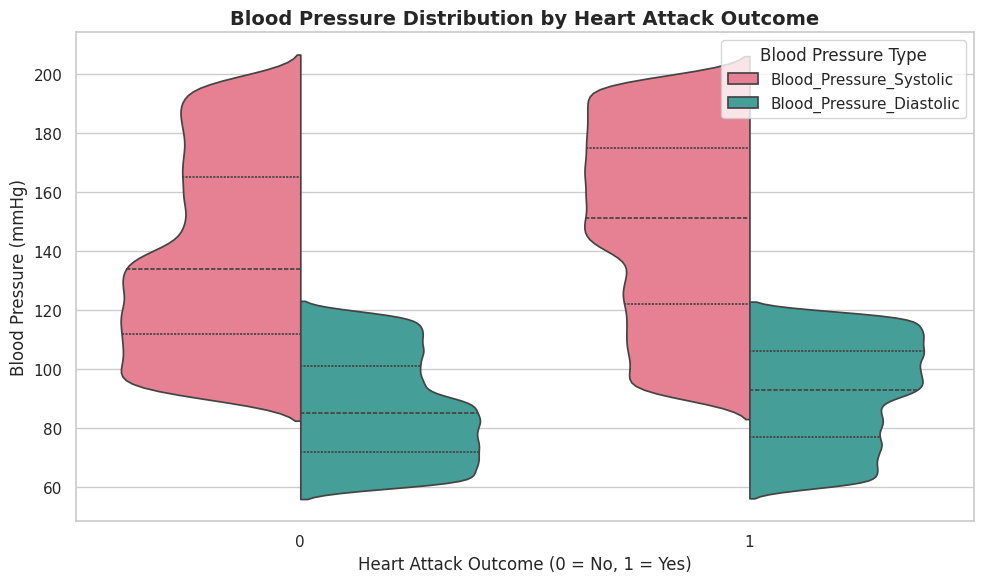

In [51]:
# Violin Plot - Blood Pressure by Heart Attack Outcome
plt.figure(figsize=(10, 6))

# Create a combined plot for both systolic and diastolic using melt
bp_data = df.melt(
    id_vars=['Heart_Attack_Outcome'],
    value_vars=['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic'],
    var_name='Blood_Pressure_Type',
    value_name='Blood_Pressure_Value'
)

sns.violinplot(
    data=bp_data,
    x='Heart_Attack_Outcome',
    y='Blood_Pressure_Value',
    hue='Blood_Pressure_Type',
    split=True,
    inner='quart',             # Show quartiles inside the violin
    palette='husl'             # Color palette for better contrast
)

plt.title("Blood Pressure Distribution by Heart Attack Outcome", fontsize=14, weight='bold')
plt.xlabel("Heart Attack Outcome (0 = No, 1 = Yes)")
plt.ylabel("Blood Pressure (mmHg)")
plt.legend(title='Blood Pressure Type', loc='upper right')
plt.tight_layout()
plt.show()

**Countplot - Smoking and Heart Attack Outcome**

Generate a countplot to visualize the number of smokers and non-smokers across heart attack outcomes.

Use a hue="Gender" parameter to compare distributions by gender.

Title: "Smoking Status and Heart Attack Outcome by Gender"

X-axis Label: "Smoking Status (Yes/No)"Y-axis Label: "Count

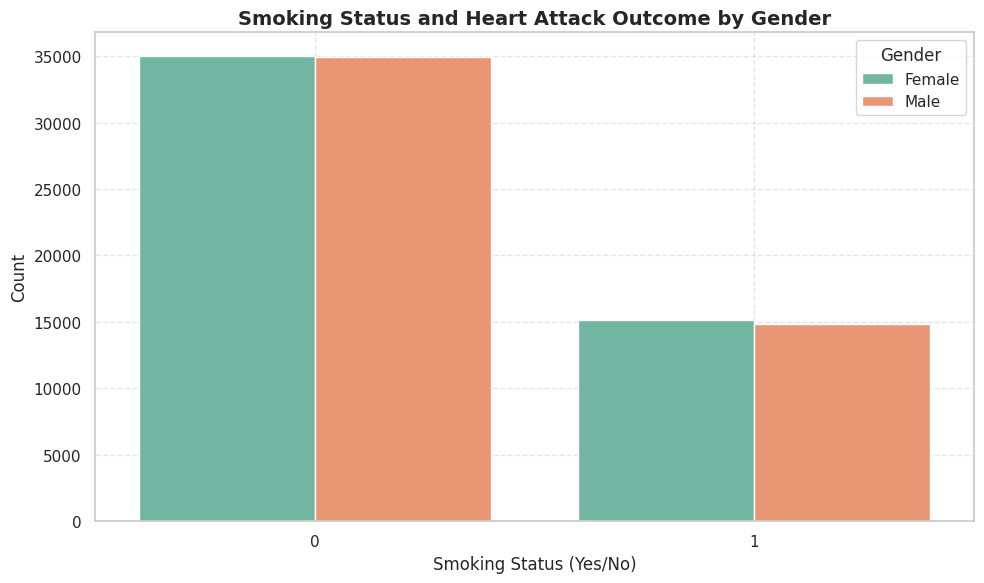

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Smoking_Status',
    hue='Gender',
    palette='Set2'
)

# Add labels and title
plt.title('Smoking Status and Heart Attack Outcome by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status (Yes/No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
